# 6.5 Machine Learning Clustering


### This script contains the following:
#### 1. Importing libraries and data cleaning
#### 2. Using Z-scores to standardize data
#### 3. Elbow Technique
#### 4. K-means clustering

## 1. Importing libraries and data cleaning

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path = r'/Users/sanyamohsini/Desktop/CareerFoundry_Data Analytics/Achievement 6'

In [4]:
path

'/Users/sanyamohsini/Desktop/CareerFoundry_Data Analytics/Achievement 6'

In [5]:
# Import us_births.csv

us_births = pd.read_csv(os.path.join(path, '02 Data', 'Prepared data', 'us_births_cleaned_2.csv'), index_col = False)

In [6]:
# Cleaning data
us_births.columns

Index(['Unnamed: 0', 'State', 'State_abbrev', 'Year', 'Gender_baby',
       'Education_level', 'Education_code', 'Births', 'Avg_age_mother',
       'Avg_birth_weight(g)'],
      dtype='object')

In [7]:
us_births.head()

,Unnamed: 0,State,State_abbrev,Year,Gender_baby,Education_level,Education_code,Births,Avg_age_mother,Avg_birth_weight(g)
0,0,Alabama,AL,2016,F,8th grade or less,1,1052,27.8,3116.9
1,1,Alabama,AL,2016,F,9th through 12th grade with no diploma,2,3436,24.1,3040.0
2,2,Alabama,AL,2016,F,High school graduate or GED completed,3,8777,25.4,3080.0
3,3,Alabama,AL,2016,F,"Some college credit, but not a degree",4,6453,26.7,3121.9
4,4,Alabama,AL,2016,F,"Associate degree (AA, AS)",5,2227,28.9,3174.3


In [8]:
# Drop unnamed column

us_births = us_births.drop(columns = ['Unnamed: 0'])

In [9]:
us_births.head()

,State,State_abbrev,Year,Gender_baby,Education_level,Education_code,Births,Avg_age_mother,Avg_birth_weight(g)
0,Alabama,AL,2016,F,8th grade or less,1,1052,27.8,3116.9
1,Alabama,AL,2016,F,9th through 12th grade with no diploma,2,3436,24.1,3040.0
2,Alabama,AL,2016,F,High school graduate or GED completed,3,8777,25.4,3080.0
3,Alabama,AL,2016,F,"Some college credit, but not a degree",4,6453,26.7,3121.9
4,Alabama,AL,2016,F,"Associate degree (AA, AS)",5,2227,28.9,3174.3


In [10]:
# Drop categorical columns
us_births = us_births.drop(columns =['State', 'State_abbrev', 'Year', 'Gender_baby', 'Education_level', 'Education_code'])

In [11]:
us_births.head()

,Births,Avg_age_mother,Avg_birth_weight(g)
0,1052,27.8,3116.9
1,3436,24.1,3040.0
2,8777,25.4,3080.0
3,6453,26.7,3121.9
4,2227,28.9,3174.3


## 2. Using Z-Scores to standardize data

In [12]:
us_births['Births'] = (us_births['Births'] - us_births['Births'].mean()) / us_births['Births'].std()

In [13]:
us_births['Avg_age_mother'] = (us_births['Avg_age_mother'] - us_births['Avg_age_mother'].mean()) / us_births['Avg_age_mother'].std()

In [14]:
us_births['Avg_birth_weight(g)'] = (us_births['Avg_birth_weight(g)'] - us_births['Avg_birth_weight(g)'].mean()) / us_births['Avg_birth_weight(g)'].std()

In [15]:
us_births.head()

,Births,Avg_age_mother,Avg_birth_weight(g)
0,-0.458117,-0.630375,-1.170647
1,-0.101606,-1.961437,-1.842520
2,0.697103,-1.493766,-1.493041
3,0.349565,-1.026096,-1.126962
4,-0.282404,-0.234653,-0.669144


## 3. Elbow Technique

In [16]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [17]:
score = [kmeans[i].fit(us_births).score(us_births) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

/Users/sanyamohsini/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/sanyamohsini/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/sanyamohsini/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/sanyamohsini/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warning

[-16485.00000000002,
 -10884.345897564319,
 -7814.103828325695,
 -6504.866783440639,
 -5453.74082052727,
 -4592.13537440795,
 -3910.51899572148,
 -3464.595817920575,
 -3088.469538002022]

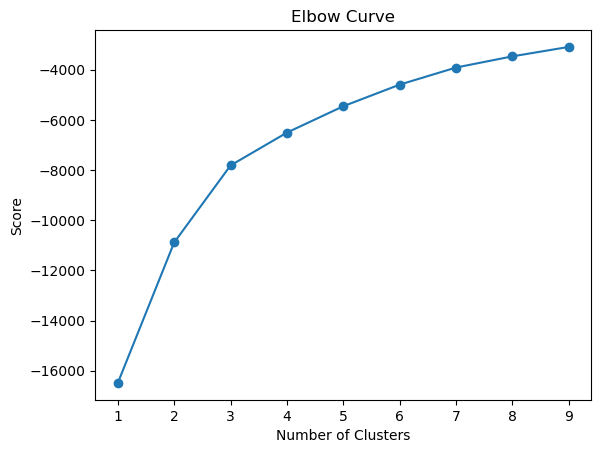

In [18]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score, marker = 'o')
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#### I choose the 4 clusters as the curve starts to smoothe out more around then and the increases aren't as dramatic as before. Overall the curve gradually starts to decrease around 4 clusters.

In [26]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 4)

In [27]:
# Fit the k-means object to the data.

kmeans.fit(us_births)

/Users/sanyamohsini/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [29]:
KMeans(n_clusters = 4)

KMeans(n_clusters=4)

In [30]:
us_births['clusters'] = kmeans.fit_predict(us_births)

/Users/sanyamohsini/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [23]:
us_births.head()

,Births,Avg_age_mother,Avg_birth_weight(g),clusters
0,-0.458117,-0.630375,-1.170647,2
1,-0.101606,-1.961437,-1.842520,2
2,0.697103,-1.493766,-1.493041,2
3,0.349565,-1.026096,-1.126962,2
4,-0.282404,-0.234653,-0.669144,2


In [31]:
us_births['clusters'].value_counts()

1    2952
0    1402
2     949
3     193
Name: clusters, dtype: int64

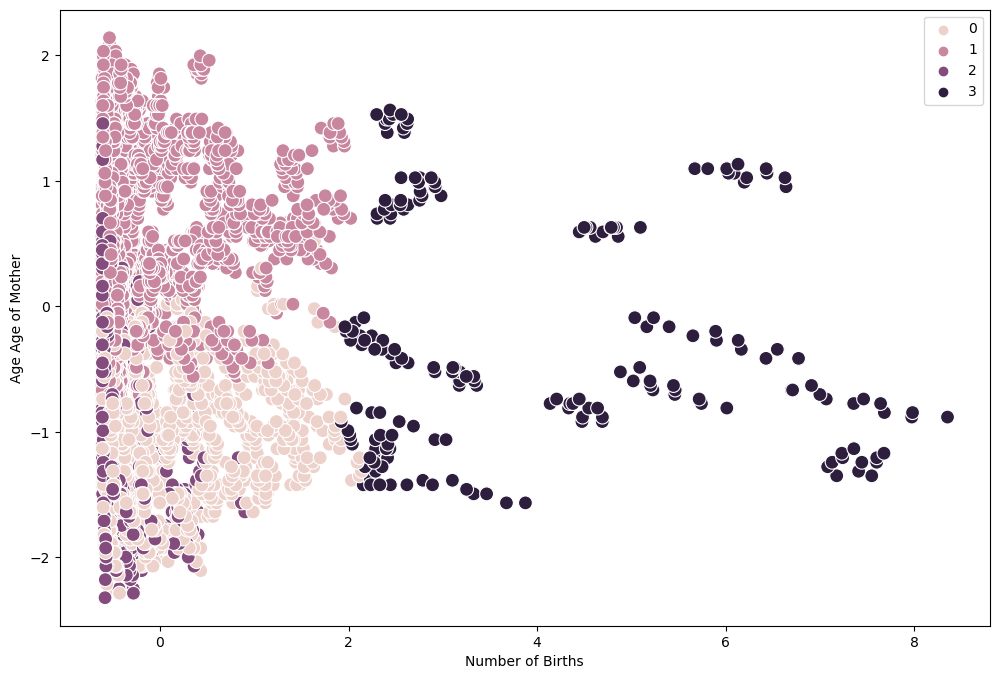

In [32]:
# Plot the clusters for the "Births" and "Avg_age_mother" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=us_births['Births'], y=us_births['Avg_age_mother'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Number of Births') # Label x-axis.
plt.ylabel('Age Age of Mother') # Label y-axis.
plt.show()

#### This plot shows that most women have relatively few births. Older and younger woman tend to have less births, while mid-aged woman have more births. This makes sense as younger woman probably haven't too many opportunities or aren't ready to have more births, while older woman potentially don't have many opportunities left to have more than 1 or 2 births. 

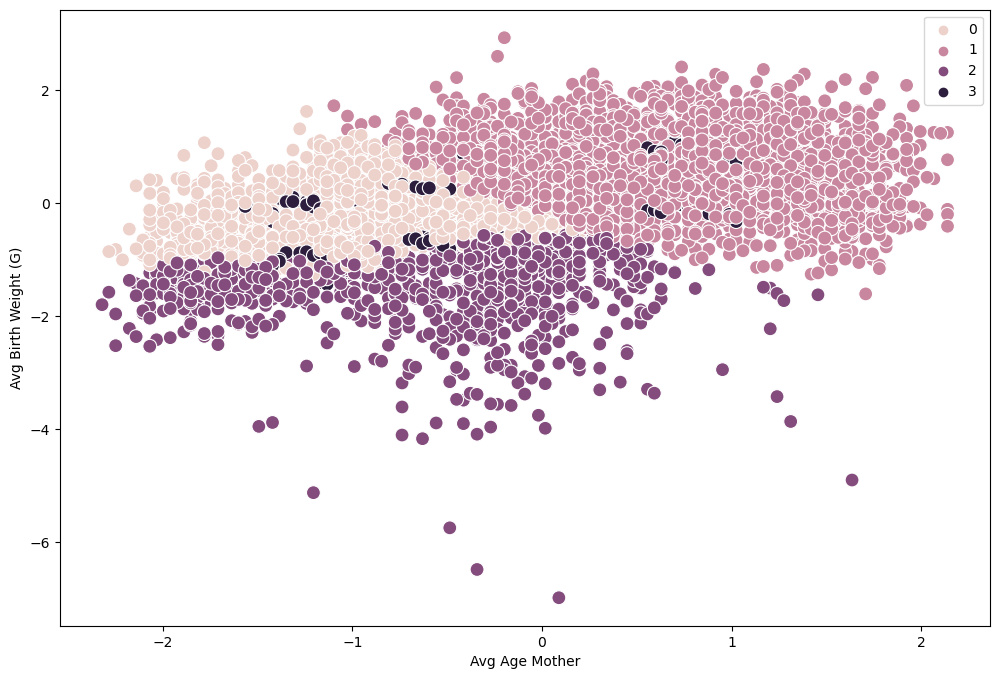

In [33]:
# Plot the clusters for the "Avg_age_mother" and "Avg_birth_weight(g)" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=us_births['Avg_age_mother'], y=us_births['Avg_birth_weight(g)'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Avg Age Mother') # Label x-axis.
plt.ylabel('Avg Birth Weight (G)') # Label y-axis.
plt.show()

#### In this plot, it generally shows that younger woman tend to have babies with a lower birth weight. Mid to older woman tend to have babies with a larger birth weight.

In [34]:
us_births.loc[us_births['clusters'] == 3, 'cluster'] = 'dark purple'
us_births.loc[us_births['clusters'] == 2, 'cluster'] = 'purple'
us_births.loc[us_births['clusters'] == 1, 'cluster'] = 'pink'
us_births.loc[us_births['clusters'] == 0, 'cluster'] = 'light pink'

In [35]:
us_births.groupby('cluster').agg({'Births':['mean', 'median'], 
                         'Avg_age_mother':['mean', 'median'], 
                         'Avg_birth_weight(g)':['mean', 'median']})

Births           Avg_age_mother           Avg_birth_weight(g)  \
                 mean    median           mean    median                mean   
cluster                                                                        
dark purple  4.018144  3.121346      -0.250870 -0.522451           -0.013201   
light pink   0.092100 -0.139964      -0.973160 -0.990121           -0.233084   
pink        -0.178667 -0.395383       0.685259  0.664713            0.595957   
purple      -0.397474 -0.539618      -0.642884 -0.486476           -1.506779   

                       
               median  
cluster                
dark purple -0.059303  
light pink  -0.283844  
pink         0.566264  
purple      -1.369850

#### In terms of births, the most births are in the "dark purple" category which is mid-age woman. Older woman in the "pink" category and younger woman in the "purple/light pink" categories tend to have less births. Additionally, older woman who are in the "pink" category tend to have babies with more weight than younger woman who are in the "purple or light pink" categories. It would be interesting to see if level of education impacts any of these variables.